## Taxa de Rotatividade (Turnover)
---
Calcular a taxa de rotatividade de funcionários, analisando as datas de admissão e demissão para avaliar a retenção de talentos.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_rh = pd.read_excel('rh.xlsx')
df_rh.head()

,Centro de Responsabilidade,Cod centro,Nome conta 1º nível,Cod conta 1º nível,Nome conta 2º nível,Cod conta 2º nível,Nome conta 3º nível,Área,Colaborador,Data da Admissão,Data da Demissão,Matrícula,Salário,Curso,Pesquisa de Clima Organizacional,Horas de Capacitação,Ano,Mês
0,Moderna,10100,Despesa,1,Despesas Correntes,11,Pessoal e Encargos,Administração,Daniel Alves (Barcelona),2007-05-03,NaN,2234,1716.54,Libras,Sim,60,2022,MARÇO
1,Moderna,10100,Despesa,1,Despesas Correntes,11,Pessoal e Encargos,Administração,Maicon (Roma),2007-05-03,NaN,2235,2129.70,-,Não,-,2022,-
2,Moderna,10100,Despesa,1,Despesas Correntes,11,Pessoal e Encargos,Administração,Marcelo (Real Madrid),2008-03-02,NaN,2236,2129.70,CIPA,Sim,20,2022,JANEIRO
3,Moderna,10100,Despesa,1,Despesas Correntes,11,Pessoal e Encargos,Administração,Maxwell (PSG),2016-03-02,NaN,2237,2129.70,-,Não,-,2022,-
4,Moderna,10100,Despesa,1,Despesas Correntes,11,Pessoal e Encargos,Administração,Bernard (Shakhtar),2020-06-03,NaN,2238,1999.13,Administração de Conflitos,Sim,10,2022,FEVEREIRO


### Total de Horas de capacitação por Centro de Responsabilidade
---
Medir o total de horas de Capacitação que cada Centro de Responsabilidade possui, desconsiderando a uma possível diferença entre número de funcionários de uma filial para outra.
É interessante uma análise da média de horas por filial.

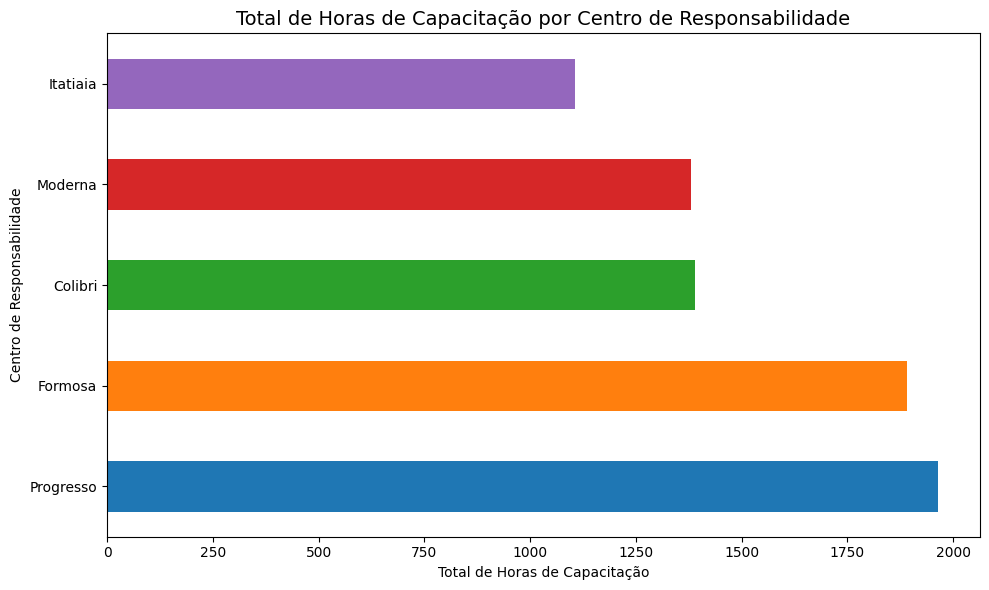

In [24]:
df_rh["Horas de Capacitação"] = pd.to_numeric(df_rh["Horas de Capacitação"], errors="coerce")
capacitacao = (
    df_rh.groupby("Centro de Responsabilidade")["Horas de Capacitação"]
    .sum()
    .sort_values(ascending=False)
)
n = len(capacitacao)

colors = plt.cm.tab10.colors
cores = [colors[i % len(colors)] for i in range(n)]

plt.figure(figsize=(10,6))
capacitacao.plot(kind="barh", color=cores)

plt.title("Total de Horas de Capacitação por Centro de Responsabilidade", fontsize=14)
plt.xlabel("Total de Horas de Capacitação")
plt.ylabel("Centro de Responsabilidade")
plt.tight_layout()
plt.savefig('graficos/total_capacitacao_bruto.png')
plt.show()

### Média de horas de Capacitação por funcionário em cada Centro de Responsabilidade
---
Como filiais podem ter diferença entre o número de funcionários, é importante analisar a **média** de horas de capacitação

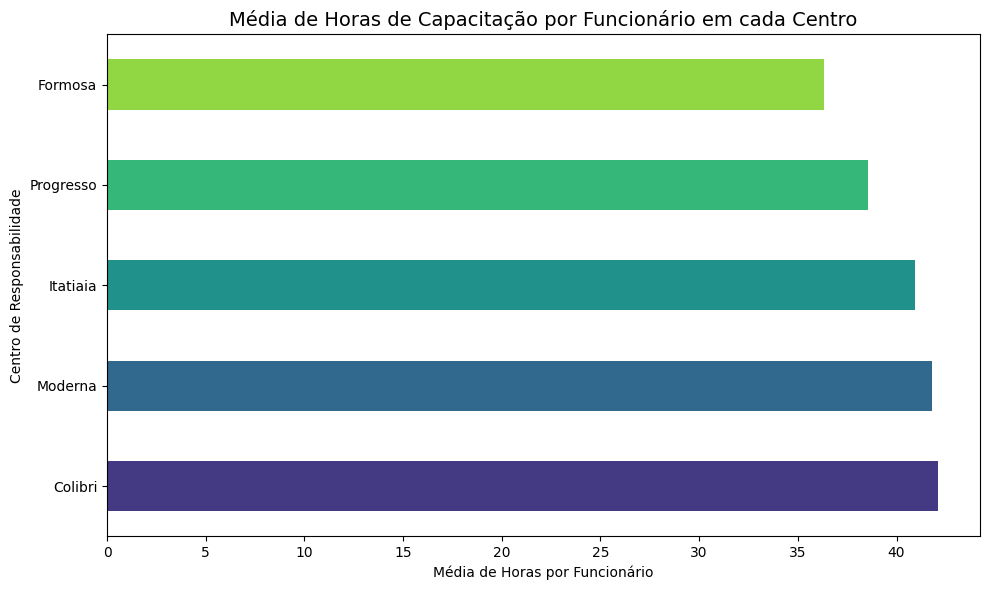

In [25]:
df_rh["Horas de Capacitação"] = pd.to_numeric(df_rh["Horas de Capacitação"], errors="coerce")
capacitacao_media = (
    df_rh.groupby("Centro de Responsabilidade")["Horas de Capacitação"]
    .mean()
    .sort_values(ascending=False)
)
plt.figure(figsize=(10,6))
capacitacao_media.plot(kind="barh", color=sns.color_palette("viridis", len(capacitacao_media)))

plt.title("Média de Horas de Capacitação por Funcionário em cada Centro", fontsize=14)
plt.xlabel("Média de Horas por Funcionário")
plt.ylabel("Centro de Responsabilidade")
plt.tight_layout()
plt.savefig('graficos/total_capacitacao_media.png')
plt.show()

## Comparação
--- 
Comparando o gráfico do total de horas brutas e horas médias, fica evidente que há um diferencial e que, na verdade, os funcionários do Centro de Itatiaia tem uma média de consumo melhor que outros, por exemplo.